In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import wrangle


## 1. Load your zillow dataset.

In [2]:
train, validate, test = wrangle.wrangle_zillow()
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0


In [3]:
train.shape

(1038959, 7)

## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tax_value using only area.

In [4]:
# Removing columns from train and making new dataframe to make dataframe more readable
train_cut = pd.DataFrame()
train_cut['area'] = train ['area']
train_cut['tax_value'] = train['tax_value']
train_cut.head()

,area,tax_value
10057,1561.0,248240.0
2004970,1770.0,88390.0
306031,1452.0,81169.0
1038595,1000.0,119174.0
270959,1974.0,432268.0


In [5]:
#Create the scaler and fit/transform my area column
mms = MinMaxScaler()

train_cut['area'] = mms.fit_transform(train_cut[['area']])

train_cut.head()

,area,tax_value
10057,0.457612,248240.0
2004970,0.518921,88390.0
306031,0.425638,81169.0
1038595,0.293048,119174.0
270959,0.578762,432268.0


In [6]:
baseline_yhat = train_cut['tax_value'].mean()

train_cut['baseline_yhat'] = baseline_yhat
train_cut.head(3)


,area,tax_value,baseline_yhat
10057,0.457612,248240.0,327962.928757
2004970,0.518921,88390.0,327962.928757
306031,0.425638,81169.0,327962.928757


In [7]:
model = LinearRegression().fit(train_cut[['area']], train_cut['tax_value'])
train_cut['ols_yhat'] = model.predict(train_cut[['area']])
train_cut.head()

,area,tax_value,baseline_yhat,ols_yhat
10057,0.457612,248240.0,327962.928757,314131.125460
2004970,0.518921,88390.0,327962.928757,345309.674341
306031,0.425638,81169.0,327962.928757,297870.542550
1038595,0.293048,119174.0,327962.928757,230441.336357
270959,0.578762,432268.0,327962.928757,375742.324924


## 3. Plot the residuals for the linear regression model that you made.

In [8]:
# compute residuals
train_cut['residual'] = train_cut['tax_value'] - train_cut['ols_yhat']
train_cut['residual_baseline'] = train_cut['tax_value'] - train_cut['baseline_yhat']
train_cut.head()

,area,tax_value,baseline_yhat,ols_yhat,residual,residual_baseline
10057,0.457612,248240.0,327962.928757,314131.125460,-65891.125460,-79722.928757
2004970,0.518921,88390.0,327962.928757,345309.674341,-256919.674341,-239572.928757
306031,0.425638,81169.0,327962.928757,297870.542550,-216701.542550,-246793.928757
1038595,0.293048,119174.0,327962.928757,230441.336357,-111267.336357,-208788.928757
270959,0.578762,432268.0,327962.928757,375742.324924,56525.675076,104305.071243


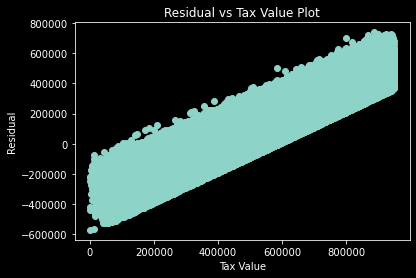

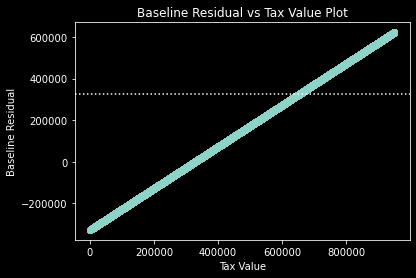

In [9]:
plt.scatter(x='tax_value', y='residual', data=train_cut)
plt.xlabel('Tax Value')
plt.ylabel('Residual')
plt.title('Residual vs Tax Value Plot')
plt.show()

plt.scatter(x='tax_value', y='residual_baseline', data=train_cut)
plt.axhline(baseline_yhat, ls=':')

plt.xlabel('Tax Value')
plt.ylabel('Baseline Residual')
plt.title('Baseline Residual vs Tax Value Plot')

plt.show()

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [10]:
#Calculate the MSE (Mean Squared Error)

MSE  = mean_squared_error(train_cut.tax_value, train_cut.ols_yhat)
print(f'MSE is {MSE}.')
print('------------------------------------')

SSE = MSE *len(train_cut)
print(f'SSE is {SSE}.')
print('------------------------------------')

ESS = sum((train_cut.ols_yhat - train_cut.tax_value.mean())**2)
print(f'ESS is {ESS}.')
print('------------------------------------')

TSS = SSE + ESS
print(f'TSS is {TSS}.')
print('------------------------------------')

RMSE = math.sqrt(MSE)
print(f'RMSE is {RMSE}.')
print('------------------------------------')


MSE is 32510725506.882072.
------------------------------------
SSE is 3.3777310861904692e+16.
------------------------------------
ESS is 7361327054838011.0.
------------------------------------
TSS is 4.11386379167427e+16.
------------------------------------
RMSE is 180307.30852320456.
------------------------------------


## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tax_value amount).

In [11]:
BASELINE_MSE= mean_squared_error(train_cut.tax_value, train_cut.baseline_yhat)
print(f'Baseline MSE is {MSE_baseline}.')
print('------------------------------------')

BASELINE_SSE = BASELINE_MSE * len(train_cut)
print(f'Baseline SSE is {BASELINE_SSE}.')
print('------------------------------------')

BASELINE_ESS = sum((train_cut.baseline_yhat - train_cut.tax_value.mean())**2)
print(f'ESS is {ESS}.')
print('------------------------------------')

BASELINE_TSS = BASELINE_SSE + BASELINE_ESS
print(f'TSS is {TSS}.')
print('------------------------------------')

BASELINE_RMSE = math.sqrt(BASELINE_MSE)
print(f'RMSE is {RMSE}.')
print('------------------------------------')

NameError: name 'MSE_baseline' is not defined

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [ ]:
#Evaluate the result of my model against the baseline
if SSE < BASELINE_SSE:
    print('The linear regression model outperforms the baseline!')
else:
    print('The model fails to improve upon the baseline.')


## 7. What is the amount of variance explained in your model?

In [ ]:
#Calculate how much variance is explained by my model
R2 = ESS / TSS
R2

## 8. Is your model better than the baseline model?

Yes but barely...

## 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [ ]:
def plot_residuals(y, yhat):
    residuals = yhat - y
    plt.scatter(x=y, y=residuals)
    plt.title('Residual plot')

In [ ]:
def regression_errors(y, yhat):
    sse = mean_squared_error(y, yhat) * len(y)
    ess = sum((yhat - y.mean()) ** 2)
    tss = sse + ess
    mse = mean_squared_error(y, yhat)
    rmse = math.sqrt(mse)
    return sse, ess, tss, mse, rmse

In [ ]:
def baseline_mean_errors(y):
    sse = mean_squared_error(y, y.mean()) * len(y)
    mse = mean_squared_error(y, y.mean())
    rmse = math.sqrt(mse)
    return sse, mse, rmse

In [ ]:
def better_than_baseline(y, yhat):
    sse = regression_errors(y, yhat)
    sse_b = baseline_mean_errors(y)
    if sse < sse_b:
        return True
    else:
        return False